# K-NEAREST NEIGHBORS AND SCIKIT-LEARN

## AGENDA

- **K-nearest neighbors (KNN)**
    - Review of the iris dataset
    - KNN classification
    - Review of supervised learning
- **scikit-learn**
    - Requirements for working with data in scikit-learn
    - scikit-learn's 4-step modeling pattern
    - Tuning a KNN model
    - Comparing KNN with other models

## REVIEW OF THE IRIS DATASET

In [2]:
# read the iris data into a DataFrame
import pandas as pd
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=col_names)




In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

In [5]:
type(iris)

pandas.core.frame.DataFrame

In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### TERMINOLOGY

- **150 observations** (n=150): each observation is one iris flower
- **4 features** (p=4): sepal length, sepal width, petal length, and petal width
- **Response**: iris species
- **Classification problem** since response is categorical

## HUMAN LEARNING ON THE IRIS DATASET

How did we (as humans) predict the species for iris flowers?

1. We looked for features that seemed to correlate with the response.
2. We created a set of rules (using those features) to predict the species of an unknown iris.

More generally:

1. We observed that the different species had (somewhat) dissimilar measurements.
2. We predicted the species for an unknown iris by:
    - Looking for irises in the data with similar measurements
    - Assuming that our unknown iris is the same species as those similar irises

In [7]:
# allow plots to appear in the notebook
%matplotlib inline

# create a custom colormap
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# map each iris species to a number
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

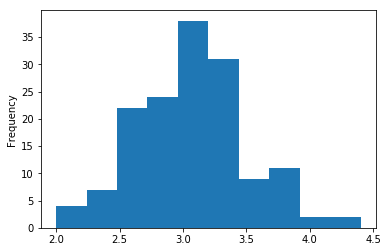

In [8]:
iris.sepal_width.plot(kind='hist')

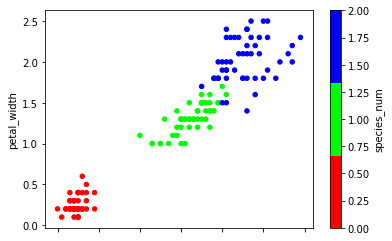

In [9]:
# create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cmap_bold)

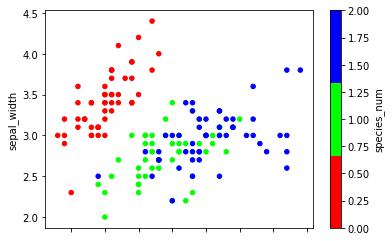

In [10]:
# create a scatter plot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap=cmap_bold)

## K-nearest neighbors (KNN) classification

### HOW DOES KNN WORK?

<img src='./images/knn-voting.png' />

1. Pick a value for K.
2. Search for the K observations in the data that are "nearest" to the measurements of the unknown iris.
    - Euclidian distance is often used as the distance metric, but other metrics are allowed.
3. Use the most popular response value from the K "nearest neighbors" as the predicted response value for the unknown iris.

**Question:** What's the "best" value for K in this case?

**Answer:** The value which produces the most accurate predictions on unseen data. We want to create a model that generalizes!

## REVIEW OF THE SUPERVISED LEARNING

![Supervised learning diagram](images/supervised_learning.png)

## REQUIREMENTS FOR WORKING WITH DATA IN SCIKIT-LEARN

1. Features and response are **separate objects**
2. Features and response should be entirely **numeric**
3. Features and response should be **NumPy arrays** (or easily convertible to NumPy arrays)
4. Features and response should have **specific shapes** (outlined below)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [13]:
# store feature matrix in "X"
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]

In [14]:
feature_cols = ['petal_length', 'petal_width']
X = iris[feature_cols]
y = iris.species_num
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [15]:
import numpy as np

iris_test = [[3, 5]]

print (knn.predict(iris_test))
print (knn.predict_proba(iris_test))

[2]
[[0. 0. 1.]]


In [16]:
X

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


In [17]:
# alternative ways to create "X"
X = iris.drop(['species', 'species_num'], axis=1)
X = iris.loc[:, 'sepal_length':'petal_width']
X = iris.iloc[:, 0:4]

In [18]:
# store response vector in "y"
y = iris.species_num

In [19]:
# check X's type
print (type(X))

<class 'pandas.core.frame.DataFrame'>


In [20]:
print (type(X.values))

<class 'numpy.ndarray'>


In [21]:
# check y's type
print (type(y))

<class 'pandas.core.series.Series'>


In [22]:
print (type(y.values))

<class 'numpy.ndarray'>


In [23]:
# check X's shape (n = number of observations, p = number of features)
print (X.shape)

(150, 4)


In [24]:
# check y's shape (single dimension with length n)
print (y.shape)

(150,)


## SCIKIT-LEARN'S 4-STEP MODELING PATTERN 

**Step 1:** Import the class you plan to use

In [25]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for "model"
- "Instantiate" means "make an instance of"

In [26]:
knn = KNeighborsClassifier(n_neighbors=1)

- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [27]:
print (knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')


**Step 3:** Fit the model with data (aka "model training")

- Model is "learning" the relationship between X and y in our "training data"
- Process through which learning occurs varies by model
- Occurs in-place

In [28]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

- Once a model has been fit with data, it's called a "fitted model"

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [29]:
import numpy as np

flower_dimensions = [[3, 5, 4, 2]]
knn.predict(flower_dimensions)
knn.predict_proba(flower_dimensions)

array([[0., 0., 1.]])

- Returns a NumPy array, and we keep track of what the numbers "mean"
- Can predict for multiple observations at once

In [30]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([2, 1])

In [31]:
knn.predict_proba(X_new)

array([[0., 0., 1.],
       [0., 1., 0.]])

## TUNING A KNN MODEL

In [32]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict(X_new)

array([1, 1])

In [33]:
# calculate predicted probabilities of class membership
knn.predict_proba(X_new)

array([[0. , 0.8, 0.2],
       [0. , 1. , 0. ]])

In [34]:
# print distances to nearest neighbors (and their identities)
flower_dimensions = [[3, 5, 4, 2]]
knn.kneighbors(flower_dimensions)

(array([[3.19374388, 3.20312348, 3.24037035, 3.35559235, 3.35559235]]),
 array([[106,  84,  59,  88,  66]]))

In [35]:
import numpy as np

flower_dimensions = [[3, 5, 4, 2]]
neighbors = knn.kneighbors(flower_dimensions)
neighbors_list = np.ravel(neighbors[1])
iris[iris.index.isin(neighbors_list)]

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
59,5.2,2.7,3.9,1.4,Iris-versicolor,1
66,5.6,3.0,4.5,1.5,Iris-versicolor,1
84,5.4,3.0,4.5,1.5,Iris-versicolor,1
88,5.6,3.0,4.1,1.3,Iris-versicolor,1
106,4.9,2.5,4.5,1.7,Iris-virginica,2


## COMPARING KNN WITH OTHER MODELS 

### Advantages of KNN:

- Simple to understand and explain
- Model training is fast
- Can be used for classification and regression!

### Disadvantages of KNN:

- Must store all of the training data
- Prediction phase can be slow when n is large
- Sensitive to irrelevant features
- Sensitive to the scale of the data
- Accuracy is (generally) not competitive with the best supervised learning methods